In [127]:
%load_ext autoreload
%autoreload
from simba import transfer_function_to_graph, tf2rss, adiabatically_eliminate
from sympy import symbols, simplify, Matrix, sqrt, conjugate, lambdify

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Tuned cavity

In [132]:
s = symbols('s')
gamma_f = symbols('gamma_f', real=True, positive=True)
tf = (s + gamma_f) / (s - gamma_f)
split_network = tf2rss(tf).to_slh().split()
eqns = split_network.frequency_domain_eqns
gamma, = split_network.aux_coupling_constants

In [136]:
ain, aind, aout = eqns.get_symbols(['ain', 'conjugate(ain)', 'aout'])
aout = eqns.solve([ain, aind])[aout]
tf = (aout / ain).simplify()
adiabatically_eliminate(tf, gamma)

(gamma_f + s)/(gamma_f - s)

In [128]:
a, ad, aout = eqns.get_symbols(['a', 'conjugate(a)', 'aout'])
aout = eqns.solve([a, ad])[aout]
tf = (aout / a).simplify()
tf

sqrt(2)*(gamma*gamma_f + gamma*s + s**2)/(2*gamma*sqrt(gamma_f))

In [130]:
split_network.interaction_hamiltonian.h

Matrix([
[0, 0, I*sqrt(gamma)*sqrt(gamma_f),                            0],
[0, 0,                           0, -I*sqrt(gamma)*sqrt(gamma_f)],
[0, 0,                           0,                            0],
[0, 0,                           0,                            0]])

In [122]:
eqns.eqns

Matrix([
[                                                                                  sqrt(gamma)*sqrt(gamma_f)*a' + s*a],
[                                                            sqrt(gamma)*sqrt(gamma_f)*conjugate(a') + s*conjugate(a)],
[                                            -sqrt(gamma)*sqrt(gamma_f)*a + sqrt(2)*sqrt(gamma)*ain - gamma*a' + s*a'],
[-sqrt(gamma)*sqrt(gamma_f)*conjugate(a) + sqrt(2)*sqrt(gamma)*conjugate(ain) - gamma*conjugate(a') + s*conjugate(a')],
[                                                                                -sqrt(2)*sqrt(gamma)*a' + ain - aout],
[                                               -sqrt(2)*sqrt(gamma)*conjugate(a') + conjugate(ain) - conjugate(aout)]])

In [118]:
adiabatically_eliminate(tf, gamma).simplify()

sqrt(2)*(gamma_f + 3*s)/(2*sqrt(gamma_f))

First looking at passive realisation of coupled cavity setup with coupling constant $g = 0$

In [28]:
s = symbols('s')
gamma_f, omega_s = symbols('gamma_f omega_s', real=True, positive=True)
tf = (s**2 + s * gamma_f + omega_s**2) / (s**2 - s * gamma_f + omega_s**2)

transfer_function_to_graph(tf, 'passive_coupled_cavity.png', layout='dot')

wrote passive_coupled_cavity.png


![](passive_coupled_cavity.png)

In [29]:
split_network = tf2rss(tf).to_slh().split()

In [30]:
h_int = split_network.interaction_hamiltonian
h_int.expr.simplify()

I*(-sqrt(gamma_1)*sqrt(gamma_f)*a_1*conjugate(a'_1) + sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1)*a'_1 + omega_s*a_1*conjugate(a_2) - omega_s*conjugate(a_1)*a_2)

In [31]:
split_network.interaction_hamiltonian.h

Matrix([
[0, 0, -I*omega_s,         0, I*sqrt(gamma_1)*sqrt(gamma_f),                              0, 0, 0],
[0, 0,          0, I*omega_s,                             0, -I*sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0]])

In [32]:
h_int.states

Matrix([
[            a_1],
[ conjugate(a_1)],
[            a_2],
[ conjugate(a_2)],
[           a'_1],
[conjugate(a'_1)],
[           a'_2],
[conjugate(a'_2)]])

In [33]:
simplify(h_int.dynamical_matrix)

Matrix([
[                           0,                            0, -omega_s,        0, sqrt(gamma_1)*sqrt(gamma_f),                           0, 0, 0],
[                           0,                            0,        0, -omega_s,                           0, sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[                     omega_s,                            0,        0,        0,                           0,                           0, 0, 0],
[                           0,                      omega_s,        0,        0,                           0,                           0, 0, 0],
[-sqrt(gamma_1)*sqrt(gamma_f),                            0,        0,        0,                           0,                           0, 0, 0],
[                           0, -sqrt(gamma_1)*sqrt(gamma_f),        0,        0,                           0,                           0, 0, 0],
[                           0,                            0,        0,        0,                           0,      

In [34]:
eqns = split_network.frequency_domain_eqns
eqns.eqns

Matrix([
[                                                                            sqrt(gamma_1)*sqrt(gamma_f)*a'_1 - omega_s*a_2 + s*a_1],
[                                           sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a'_1) - omega_s*conjugate(a_2) + s*conjugate(a_1)],
[                                                                                                               omega_s*a_1 + s*a_2],
[                                                                                         omega_s*conjugate(a_1) + s*conjugate(a_2)],
[                                            -sqrt(gamma_1)*sqrt(gamma_f)*a_1 + sqrt(2)*sqrt(gamma_1)*ain_1 - gamma_1*a'_1 + s*a'_1],
[-sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1) + sqrt(2)*sqrt(gamma_1)*conjugate(ain_1) - gamma_1*conjugate(a'_1) + s*conjugate(a'_1)],
[                                                                                                                            s*a'_2],
[                                                    

Looking at adiabatic elimination of $a_1'$

$\dot{a}_1' = -\gamma_1 a_1' - \sqrt{\gamma_1 \gamma_f} a_1 + \sqrt{2 \gamma_1} a_\text{in}$

adiabatic elimination: $\dot{a}_1' = 0$

$a_1' = \sqrt{\frac{\gamma_f}{\gamma_1}} a_1 - \sqrt{\frac{2}{\gamma_1}} a_\text{in}$

$H_\text{int} = i \sqrt{2\gamma_f}(a_\text{in}^\dagger a_1 - a_\text{in} a_1^\dagger)$

In [35]:
eqns.states.T

Matrix([[a_1, conjugate(a_1), a_2, conjugate(a_2), a'_1, conjugate(a'_1), a'_2, conjugate(a'_2), ain_1, conjugate(ain_1), aout_1, conjugate(aout_1), ain_2, conjugate(ain_2), aout_2, conjugate(aout_2)]])

In [36]:
# Calculating the input-output transfer function
ain1, aout1 = eqns.get_symbols(['ain_1', 'aout_1'])
aout1 = eqns.solve([ain1, conjugate(ain1)])[aout1]
tf = (aout1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
adiabatically_eliminate(tf, gamma_1)

(gamma_f*s + omega_s**2 + s**2)/(gamma_f*s - omega_s**2 - s**2)

In [37]:
(aout1 / ain1).simplify()

(gamma_1*gamma_f*s + gamma_1*omega_s**2 + gamma_1*s**2 + omega_s**2*s + s**3)/(gamma_1*gamma_f*s - (gamma_1 - s)*(omega_s**2 + s**2))

In [38]:
(s**2 + s * gamma_f + omega_s**2) / (s**2 - s * gamma_f + omega_s**2)

(gamma_f*s + omega_s**2 + s**2)/(-gamma_f*s + omega_s**2 + s**2)

In [58]:
a1, a1d, aout_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'aout_1'])
aout1 = eqns.solve([a1, a1d])[aout_1]
tf = (aout1 / a1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
# tf
tf = adiabatically_eliminate(tf.subs(omega_s, 0), gamma_1)
tf.simplify()

sqrt(2)*(gamma_f + s)/(2*sqrt(gamma_f))

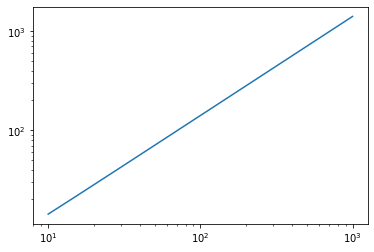

In [54]:
f = symbols('f')
tf_ = lambdify(f, tf.subs({gamma_f: 10, s: 2j*np.pi*f}))

fs = np.logspace(1, 3, num=1000)
tfs = np.abs(tf_(fs))

plt.loglog(fs, tfs)
plt.show()

In [40]:
a1, a1d, ain_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'ain_1'])
ain1 = eqns.solve([a1, a1d])[ain_1]
tf = (ain1 / a1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
# tf
tf = adiabatically_eliminate(tf.subs(omega_s, 0), gamma_1)
tf.simplify()

sqrt(2)*(gamma_f - s)/(2*sqrt(gamma_f))

Now looking at the active realisation ($g \neq 0$)

In [14]:
# parameterise with lambda = g**2 - omega_s**2 > 0
lmbda = symbols('lambda', real=True, positive=True)
tf = (s**2 + s * gamma_f - lmbda) / (s**2 - s * gamma_f - lmbda)

transfer_function_to_graph(tf, 'active_coupled_cavity.png', layout='dot')

wrote active_coupled_cavity.png


![](active_coupled_cavity.png)

In [15]:
split_network = tf2rss(tf).to_slh().split()
h_int = split_network.interaction_hamiltonian
h_int.expr.simplify()

I*(-sqrt(gamma_1)*sqrt(gamma_f)*a_1*conjugate(a'_1) + sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1)*a'_1 - sqrt(lambda)*a_1*a_2 + sqrt(lambda)*conjugate(a_1)*conjugate(a_2))

In [16]:
simplify(h_int.dynamical_matrix)

Matrix([
[                           0,                            0,            0, sqrt(lambda), sqrt(gamma_1)*sqrt(gamma_f),                           0, 0, 0],
[                           0,                            0, sqrt(lambda),            0,                           0, sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[                           0,                 sqrt(lambda),            0,            0,                           0,                           0, 0, 0],
[                sqrt(lambda),                            0,            0,            0,                           0,                           0, 0, 0],
[-sqrt(gamma_1)*sqrt(gamma_f),                            0,            0,            0,                           0,                           0, 0, 0],
[                           0, -sqrt(gamma_1)*sqrt(gamma_f),            0,            0,                           0,                           0, 0, 0],
[                           0,                            0,       

In [17]:
eqns = split_network.frequency_domain_eqns
eqns.eqns

Matrix([
[                                                            sqrt(gamma_1)*sqrt(gamma_f)*a'_1 + sqrt(lambda)*conjugate(a_2) + s*a_1],
[                                                 sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a'_1) + sqrt(lambda)*a_2 + s*conjugate(a_1)],
[                                                                                               sqrt(lambda)*conjugate(a_1) + s*a_2],
[                                                                                               sqrt(lambda)*a_1 + s*conjugate(a_2)],
[                                            -sqrt(gamma_1)*sqrt(gamma_f)*a_1 + sqrt(2)*sqrt(gamma_1)*ain_1 - gamma_1*a'_1 + s*a'_1],
[-sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1) + sqrt(2)*sqrt(gamma_1)*conjugate(ain_1) - gamma_1*conjugate(a'_1) + s*conjugate(a'_1)],
[                                                                                                                            s*a'_2],
[                                                    

In [18]:
# Calculating the input-output transfer function
ain1, aout1 = eqns.get_symbols(['ain_1', 'aout_1'])
aout1 = eqns.solve([ain1, conjugate(ain1)])[aout1]
tf = (aout1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
adiabatically_eliminate(tf, gamma_1)

(-gamma_f*s + lambda - s**2)/(-gamma_f*s - lambda + s**2)

In [19]:
(s**2 + s * gamma_f - lmbda) / (s**2 - s * gamma_f - lmbda)

(gamma_f*s - lambda + s**2)/(-gamma_f*s - lambda + s**2)

Differs by phase shift of $\pi$

Now let's look at the transfer function from $a_1$ to $aout_1$, expect it to be frequency independent

In [20]:
eqns.states.T

Matrix([[a_1, conjugate(a_1), a_2, conjugate(a_2), a'_1, conjugate(a'_1), a'_2, conjugate(a'_2), ain_1, conjugate(ain_1), aout_1, conjugate(aout_1), ain_2, conjugate(ain_2), aout_2, conjugate(aout_2)]])

In [21]:
a1, a1d, aout_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'aout_1'])
aout1 = eqns.solve([a1, a1d])[aout_1]
tf = (aout1 / a1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf
# tf = adiabatically_eliminate(tf, gamma_1)
# tf

sqrt(2)*(gamma_1*gamma_f*s - gamma_1*lambda + gamma_1*s**2 - lambda*s + s**3)/(2*gamma_1*sqrt(gamma_f)*s)

In [22]:
adiabatically_eliminate(tf.subs(lmbda, 0).simplify(), gamma_1).simplify()

sqrt(2)*(gamma_f + s)/(2*sqrt(gamma_f))

In [23]:
a1, a1d, ain_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'ain_1'])
ain1 = eqns.solve([a1, a1d])[ain_1]
tf = (a1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf = adiabatically_eliminate(tf, gamma_1)
tf

sqrt(2)*sqrt(gamma_f)*s/(gamma_f*s + lambda - s**2)

In [24]:
1 / (tf.subs(lmbda, 0).simplify())

sqrt(2)*(gamma_f - s)/(2*sqrt(gamma_f))

In [25]:
a2, a2d, aout_1 = eqns.get_symbols(['a_2', 'conjugate(a_2)', 'aout_1'])
aout1 = eqns.solve([a2, a2d])[aout_1]
tf = (aout1 / a2d).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf = adiabatically_eliminate(tf, gamma_1)
tf

(-sqrt(2)*gamma_f*s + sqrt(2)*lambda - sqrt(2)*s**2)/(2*sqrt(gamma_f)*sqrt(lambda))

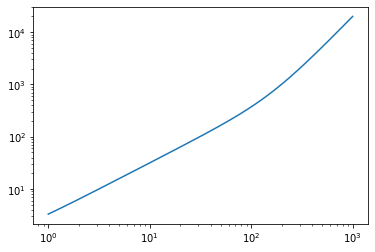

In [26]:
from sympy import I, pi, lambdify
params = {gamma_f: 1000, lmbda: 2000}
f = symbols('f')
replaced = tf.subs(params).subs(s, I*2*pi*f).simplify()
fn = lambdify(f, replaced, 'numpy')

import numpy as np
import matplotlib.pyplot as plt

fs = np.logspace(0, 3, num=1000)
ys = fn(fs)

fig, ax = plt.subplots()
ax.loglog(fs, abs(ys))
plt.show()

# WHY does it look inverted? Response should decrease at higher frequencies